In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 5]

import statsmodels.api as sm
import numpy as np
from hmmlearn import hmm


## Simulating from a statsmodels ARIMA model

## Exercise: simulate from an ARMA model
### hint (see statsmodels.api.tsa)

## Simulating a hidden markov model from hmmlearn

In [81]:
startprob = np.array([0.5, 0.3, 0.2])

transmat  = np.array([[0.7, 0.2, 0.1],
                      [0.3, 0.5, 0.2],
                      [0.1, 0.1, 0.8]])
mus       = np.array([[0.0,  0.0],
                      [9.0, 10.0],
                      [11.0, -1.0]])

## must have shape (n_components, n_dim, n_dim)
sigma = np.dstack([np.array([[1.0, 0.9],[0.9, 1.0]]),
                  np.array([[1.0, -0.5],[-0.5, 1.0]]), 
                  np.array([[1.0, 0.0],[0.0, 1.0]])])
sigma = np.transpose(sigma, [2, 0, 1])

# create a GaussianHMM object
model = hmm.GaussianHMM(n_components = 3, covariance_type = "full")

# set parameters directly rather than fitting to data
model.startprob_ = startprob
model.transmat_  = transmat
model.means_     = mus
model.covars_    = sigma

# generate ordered samples
X, Z = model.sample(500)

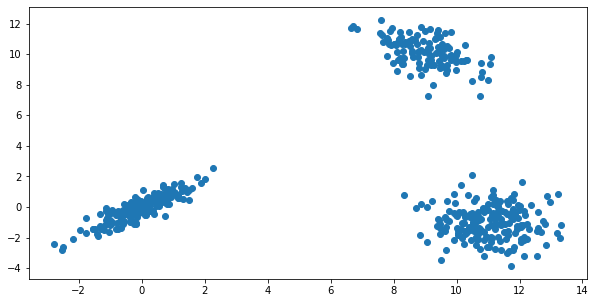

In [82]:
plt.scatter(X[:, 0], X[:, 1])

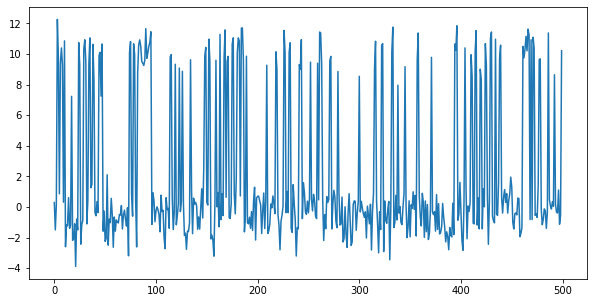

In [83]:
plt.plot(X[:, 1])

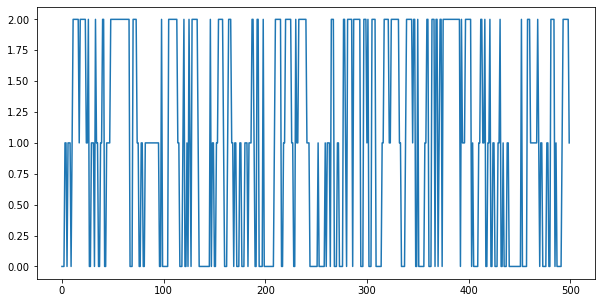

In [84]:
plt.plot(Z)